# Download da base por API Kaggle

In [ ]:
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kaggle
from ydata_profiling import ProfileReport

In [16]:

kaggle.api.authenticate()

In [17]:

kaggle.api.dataset_download_files("borapajo/food-choices", path=fr'..\data\raw',unzip=True)
kaggle.api.dataset_metadata("borapajo/food-choices",path=fr'..\data\raw')

Dataset URL: https://www.kaggle.com/datasets/borapajo/food-choices


'..\\data\\raw\\dataset-metadata.json'

In [ ]:
df = pd.read_csv(fr'..\data\raw\food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [19]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

 O dicionario de dados pode ser encontrado em PT-BR no arquivo "dicionario_de_dados_food_choices.csv"

# EDA - Exploration Data Analysis 

In [20]:

df.describe(include='all')

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,123,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,124,123,106.000000,...,124.000000,123.000000,125.000000,124.000000,125.000000,99,125.000000,125.000000,125.000000,123
unique,38,NaN,NaN,NaN,NaN,NaN,NaN,124,106,NaN,...,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,47
top,3.5,NaN,NaN,NaN,NaN,NaN,NaN,none,boredom,NaN,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,135
freq,13,NaN,NaN,NaN,NaN,NaN,NaN,1,7,NaN,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,8
mean,NaN,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,NaN,NaN,2.698113,...,1.217742,1.390244,3.336000,947.580645,555.040000,NaN,4.008000,1.512000,1073.400000,NaN
std,NaN,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,NaN,NaN,1.972042,...,0.414385,0.489800,1.436528,202.090179,152.370379,NaN,1.081337,0.501867,248.667092,NaN
min,NaN,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,580.000000,345.000000,NaN,1.000000,1.000000,575.000000,NaN
25%,NaN,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,2.000000,725.000000,500.000000,NaN,3.000000,1.000000,900.000000,NaN
50%,NaN,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,3.000000,940.000000,500.000000,NaN,4.000000,2.000000,900.000000,NaN
75%,NaN,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,NaN,NaN,3.000000,...,1.000000,2.000000,5.000000,1165.000000,690.000000,NaN,5.000000,2.000000,1315.000000,NaN


In [21]:
line,col = df.shape
print(f'Número de linhas: {line}, Número de colunas: {col}')

Número de linhas: 125, Número de colunas: 61


In [22]:
# o método info trás informações gerais sobre valores nulos, tipos de dados e memória utilizada
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [23]:
df.dtypes

GPA                  object
Gender                int64
breakfast             int64
calories_chicken      int64
calories_day        float64
                     ...   
type_sports          object
veggies_day           int64
vitamins              int64
waffle_calories       int64
weight               object
Length: 61, dtype: object

In [24]:
# Verificando valores nulos
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

# Tratamento inicial

## Tratando valores nulos ou redundantes

Foi possível constatar que existem duas colunas similares: 'comfort_food_reasons_coded' e 'comfort_food_reasons_coded.1'

In [25]:
df[['comfort_food_reasons_coded','comfort_food_reasons_coded.1']]

,comfort_food_reasons_coded,comfort_food_reasons_coded.1
0,9.0,9
1,1.0,1
2,1.0,1
3,2.0,2
4,1.0,1
...,...,...
120,NaN,2
121,NaN,3
122,NaN,3
123,NaN,7


In [26]:
df[['comfort_food_reasons_coded','comfort_food_reasons_coded.1']].isnull().sum()

comfort_food_reasons_coded      19
comfort_food_reasons_coded.1     0
dtype: int64

In [27]:
# excluindo a coluna 'comfort_food_reasons_coded' que tem valores faltantes e é igual a 'comfort_food_reasons_coded.1'
df = df.drop('comfort_food_reasons_coded',axis =1)

Tratamento da coluna GPA e valores nulos

In [28]:
# em tese essa coluna deveria ser floa
df['GPA'].describe()

count     123
unique     38
top       3.5
freq       13
Name: GPA, dtype: object

In [29]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [30]:
df['GPA'] = df['GPA'].replace('3.79 bitch','3.79')
valores_invalidos =['Personal ','Unknown']
df['GPA'] = df['GPA'].replace(valores_invalidos,np.nan)

In [31]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35', '2.6',
       '3.67', '3.73', '3.79', '2.71', '3.68', '3.75', '3.92', '3.77',
       '3.63', '3.882'], dtype=object)

In [32]:
# Converter a coluna GPA para float
df['GPA'] = df['GPA'].astype(float)

In [33]:
df['GPA'].mean()

3.4186528925619832

In [34]:
# vamos preencher os valore na coma média pois não temos outliers extremos 
df['GPA'] = df['GPA'].fillna(df['GPA'].mean())

In [35]:
df['GPA'].unique()

array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41865289, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 3.79      ,
       2.71      , 3.68      , 3.75      , 3.92      , 3.77      ,
       3.63      , 3.882     ])

In [36]:
faltantes_porcentagem = (df.isnull().sum() / len(df)) * 100
df_faltantes = faltantes_porcentagem.sort_values(ascending=False).reset_index()
df_faltantes.columns = ['Coluna', 'Porcentagem (%)']

# Exibir o DataFrame formatado
print(df_faltantes)

                          Coluna  Porcentagem (%)
0                    type_sports             20.8
1                   calories_day             15.2
2                        cuisine             13.6
3                       exercise             10.4
4                     employment              7.2
5              father_profession              2.4
6            meals_dinner_friend              2.4
7               mother_education              2.4
8                           cook              2.4
9                 eating_changes              2.4
10                         drink              1.6
11                      fav_food              1.6
12                        sports              1.6
13                        weight              1.6
14                   fav_cuisine              1.6
15          comfort_food_reasons              1.6
16             mother_profession              1.6
17                 on_off_campus              0.8
18                  persian_food              0.8


Vamos tratar as colunas com porcentagem de faltantes >10%, ou seja:type_sports,calories_day,cuisine,exercise.

In [37]:
df[['type_sports', 'calories_day', 'cuisine', 'exercise']].dtypes

type_sports      object
calories_day    float64
cuisine         float64
exercise        float64
dtype: object

In [38]:
df['type_sports'].unique

<bound method Series.unique of 0       car racing
1      Basketball 
2             none
3              NaN
4         Softball
          ...     
120       Softball
121    basketball 
122           none
123            NaN
124            NaN
Name: type_sports, Length: 125, dtype: object>

In [39]:
df['type_sports'] = df['type_sports'].replace(np.nan,'Unknow')

In [40]:
df['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [41]:
# Preencher valores ausentes com uma nova categoria (0 para "não informado")
df['calories_day'] = df['calories_day'].fillna(0)

In [42]:
# para Cousine, vamos inserir a catergoria 6 para vlaores faltantes, que representar 'Other' ou não informado
df['cuisine'] = df['cuisine'].replace(np.nan,6)

In [43]:
# Preencher valores ausentes com uma nova categoria (0 para "não informado")
df['exercise'] = df['exercise'].replace(np.nan,0)

## Explorando vestigios e tratamento com o ydata-profiling

In [44]:
profile = ProfileReport(df, title="Pandas Profiling Report_food")
profile.to_file(fr"..\relatorios\Pandas_Profiling_Report_food.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


In [45]:
df['weight'].unique()
df['weight'] = df['weight'].replace("I'm not answering this. ",np.nan)
df['weight'] = df['weight'].replace("Not sure, 240",240)
df['weight'] = df['weight'].replace("144 lbs",np.nan)


In [46]:

df['weight'].unique()

array(['187', '155', nan, 240, '190', '180', '137', '125', '116', '110',
       '264', '123', '185', '145', '170', '135', '165', '175', '195',
       '105', '160', '167', '115', '205', '128', '150', '140', '120',
       '100', '113', '168', '169', '200', '265', '192', '118', '210',
       '112', '130', '127', '129', '260', '184', '230', '138', '156'],
      dtype=object)

In [47]:
df['weight'] = pd.to_numeric(df['weight'])

In [48]:
df['weight'].replace(np.nan,df['weight'].mean(), inplace=True)

C:\Users\jhona\AppData\Local\Temp\ipykernel_14984\3004975675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].replace(np.nan,df['weight'].mean(), inplace=True)


In [49]:
df['weight'].unique()

array([187.        , 155.        , 159.17355372, 240.        ,
       190.        , 180.        , 137.        , 125.        ,
       116.        , 110.        , 264.        , 123.        ,
       185.        , 145.        , 170.        , 135.        ,
       165.        , 175.        , 195.        , 105.        ,
       160.        , 167.        , 115.        , 205.        ,
       128.        , 150.        , 140.        , 120.        ,
       100.        , 113.        , 168.        , 169.        ,
       200.        , 265.        , 192.        , 118.        ,
       210.        , 112.        , 130.        , 127.        ,
       129.        , 260.        , 184.        , 230.        ,
       138.        , 156.        ])

In [50]:
df.to_csv(fr'..\data\processado\food_cleaned.csv', index=False)

# Análises

In [51]:
path = (fr'..\data\processado\food_cleaned.csv')
df_processado = pd.read_csv(path)
df_processado.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,0.0,315.0,1,none,we dont have comfort,2.0,9,6.0,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.000000
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.000000
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,159.173554
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,Unknow,3,1,1315,240.000000
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190.000000


Vamos tirar as colunas abaixo, pois são colunas de resposat em aberto, ou que foram codificadas em outras colunas: <br>
calories_chicken <br>
diet_current <br>
food_childhood<br>
healthy_meal<br>
ideal_diet<br>
meals_dinner_friend<br>

In [52]:
colunas_remocao =['calories_chicken','diet_current','food_childhood','healthy_meal','ideal_diet','meals_dinner_friend']
df_processado.drop(colunas_remocao, axis=1, inplace=True)

In [53]:
df_processado.shape

(125, 54)

## Vizualizando dados com seaborn e matplotlib

Histogramas para variaveis numéricas

In [55]:
# Vamos selecionar apenas as colunas numéricas int e float
numeric_cols = df_processado.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['GPA', 'Gender', 'breakfast', 'calories_day', 'calories_scone',
       'coffee', 'cook', 'comfort_food_reasons_coded.1', 'cuisine',
       'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')

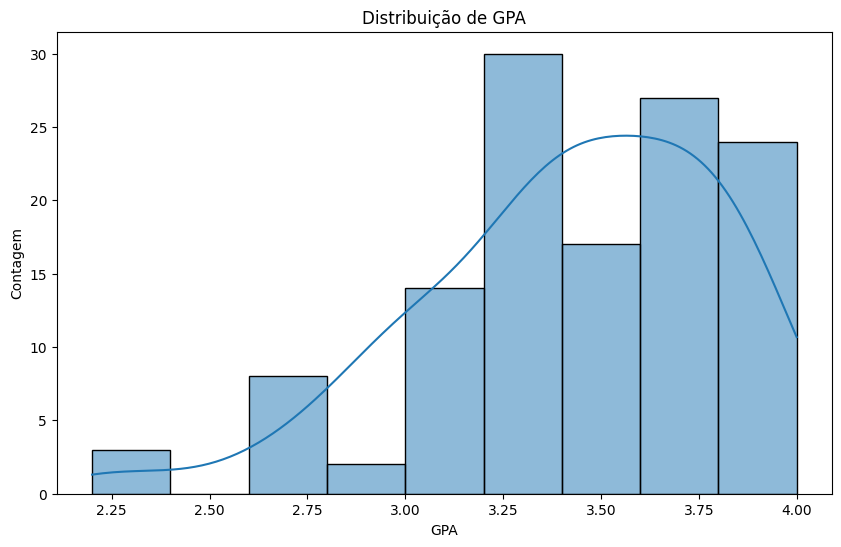

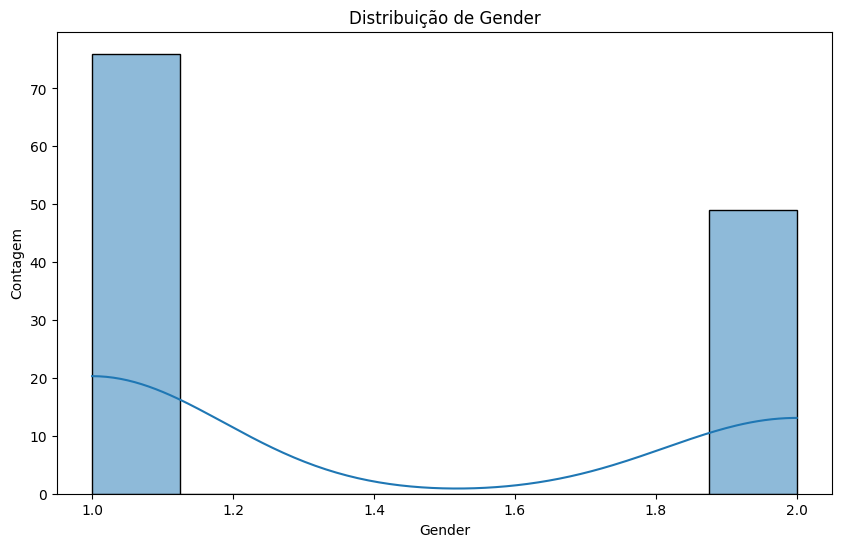

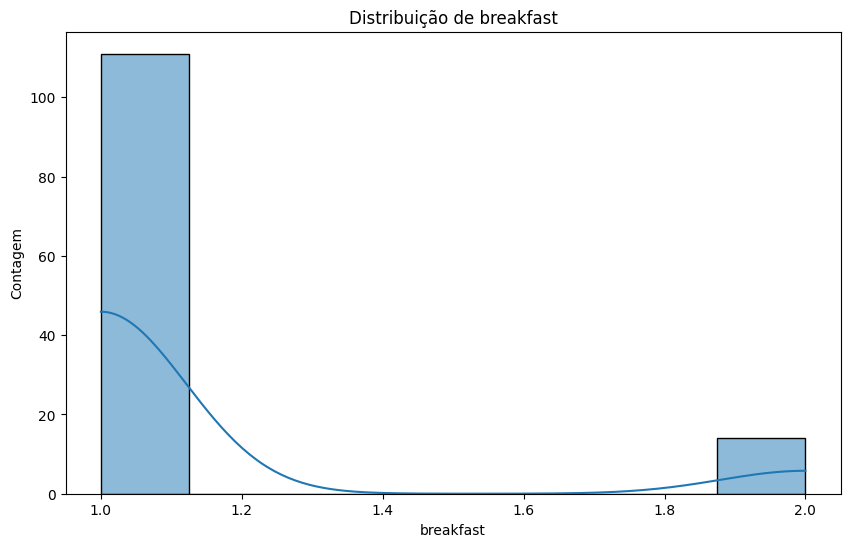

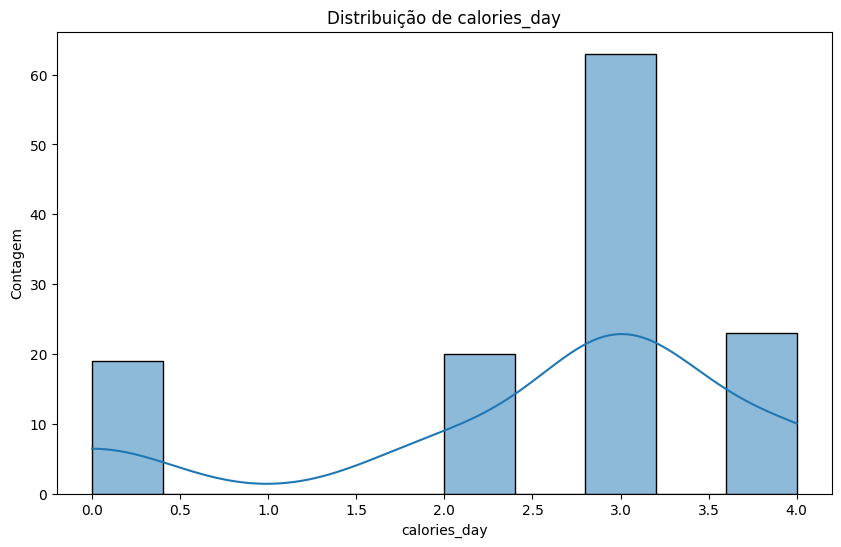

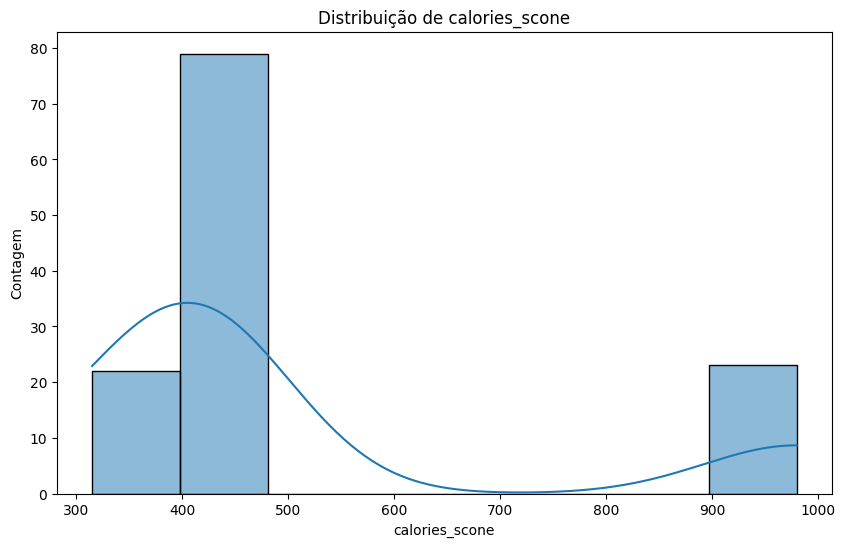

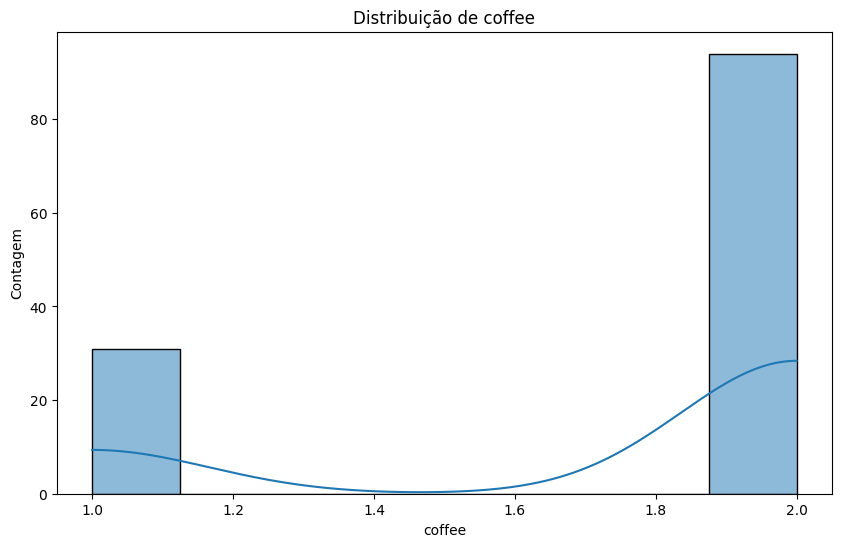

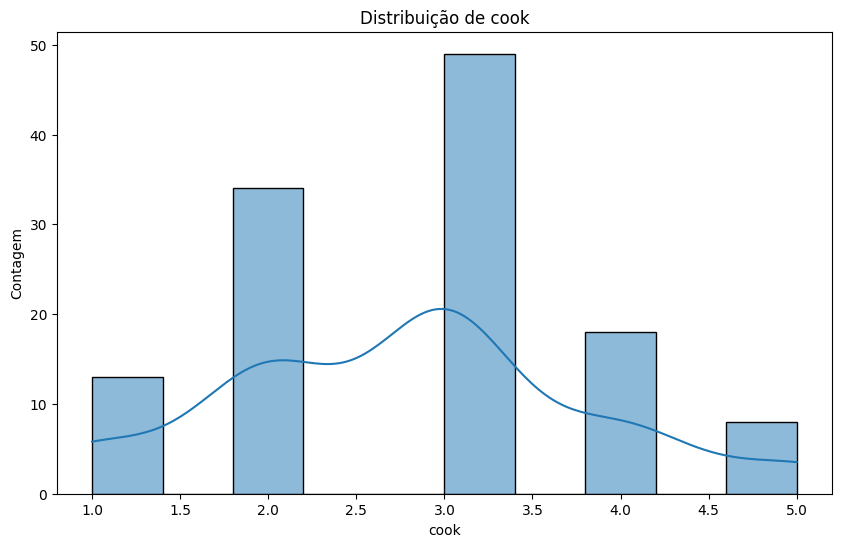

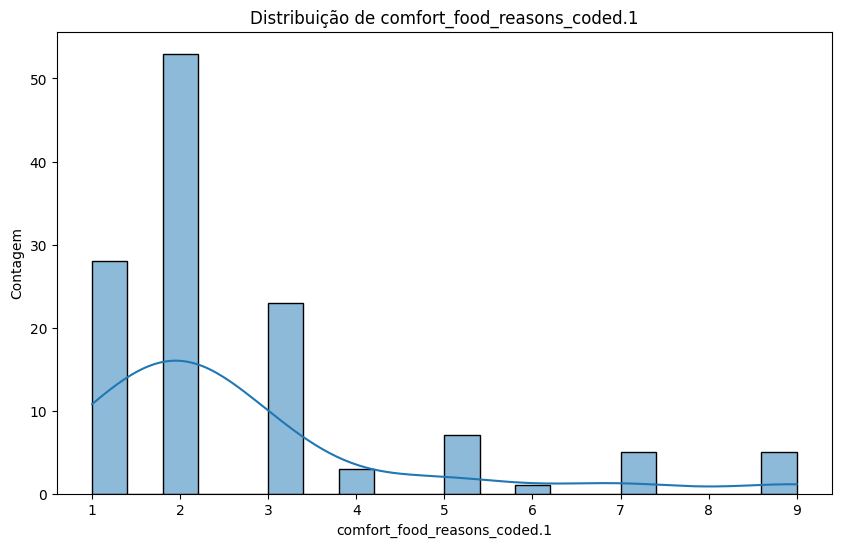

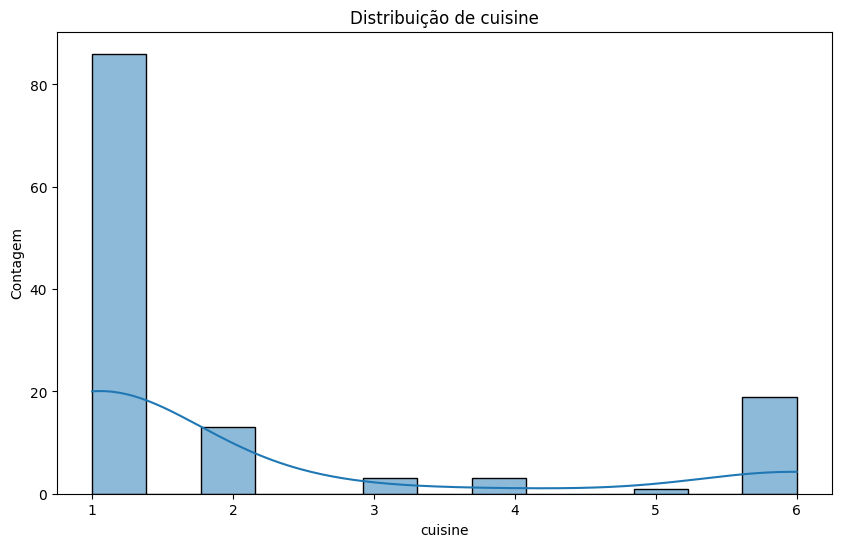

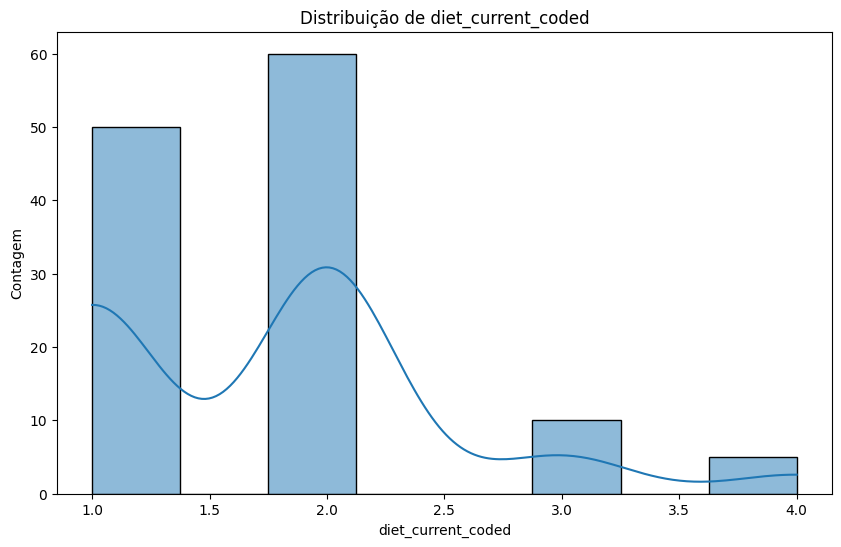

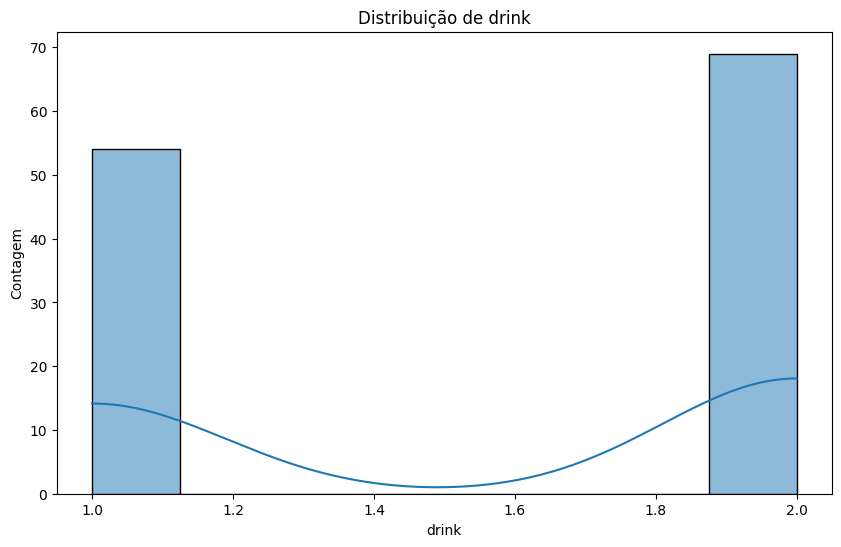

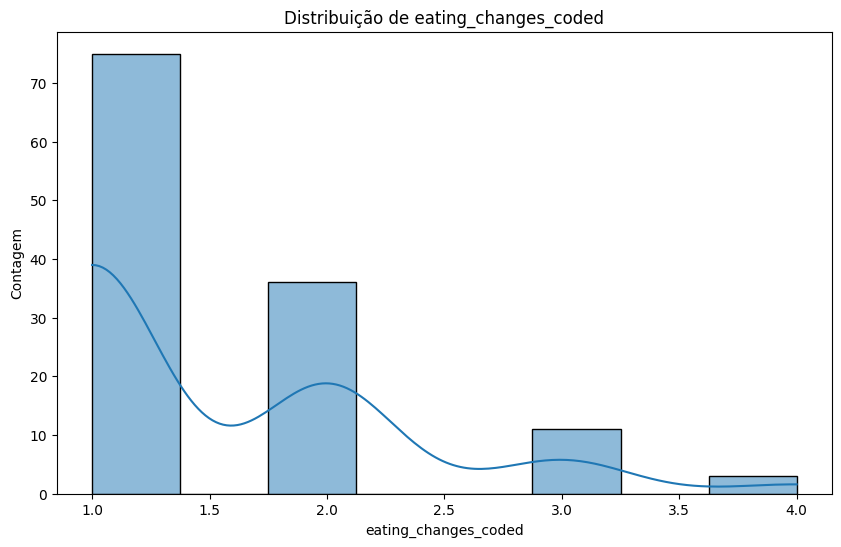

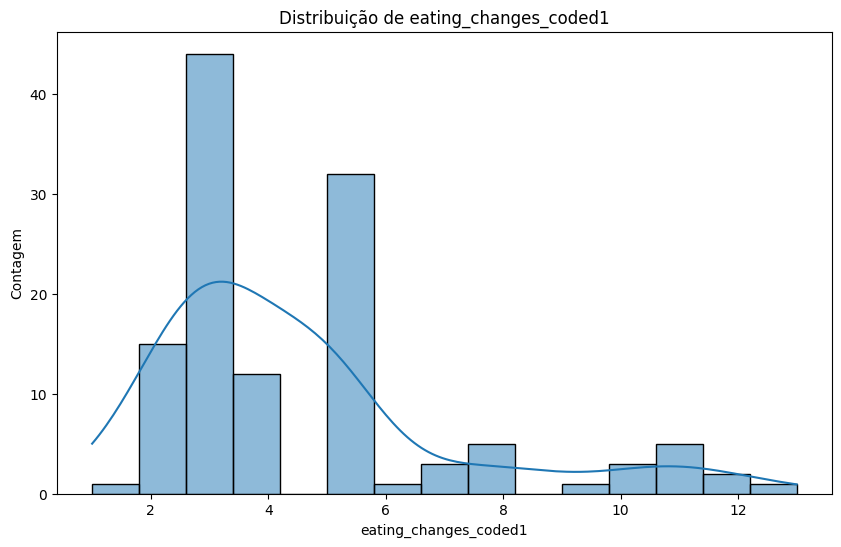

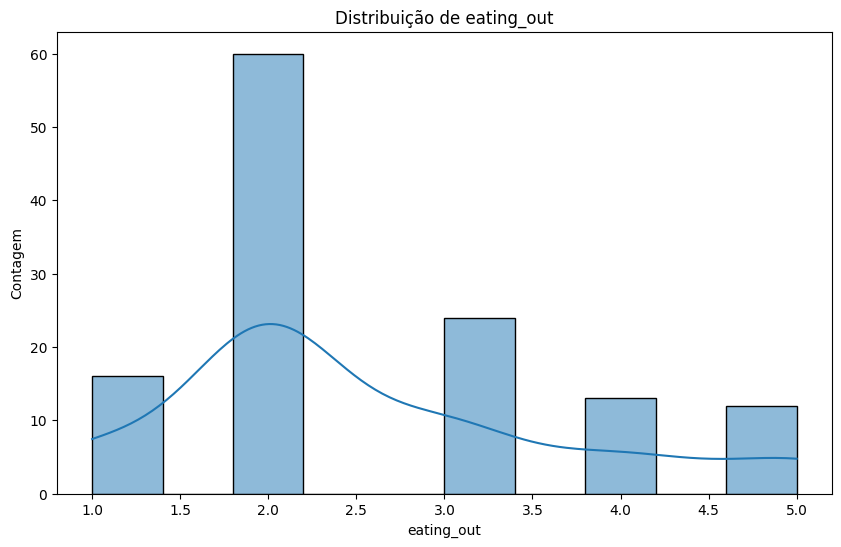

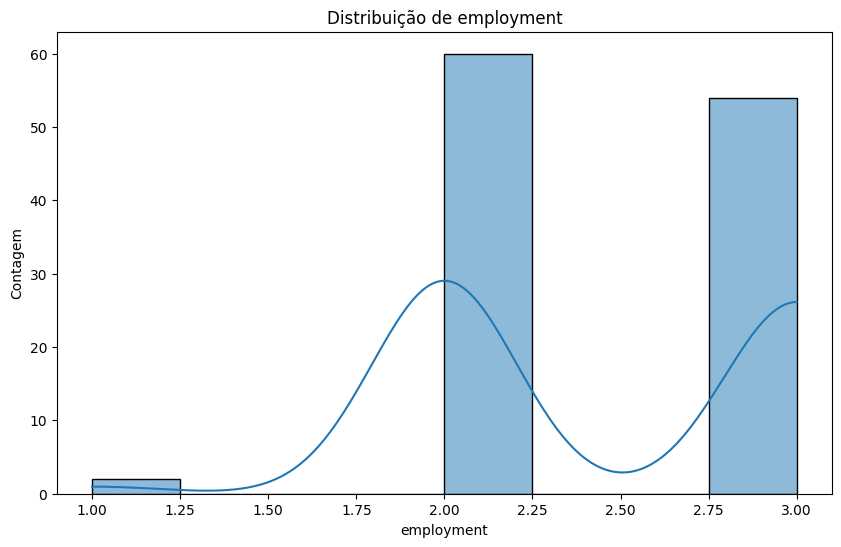

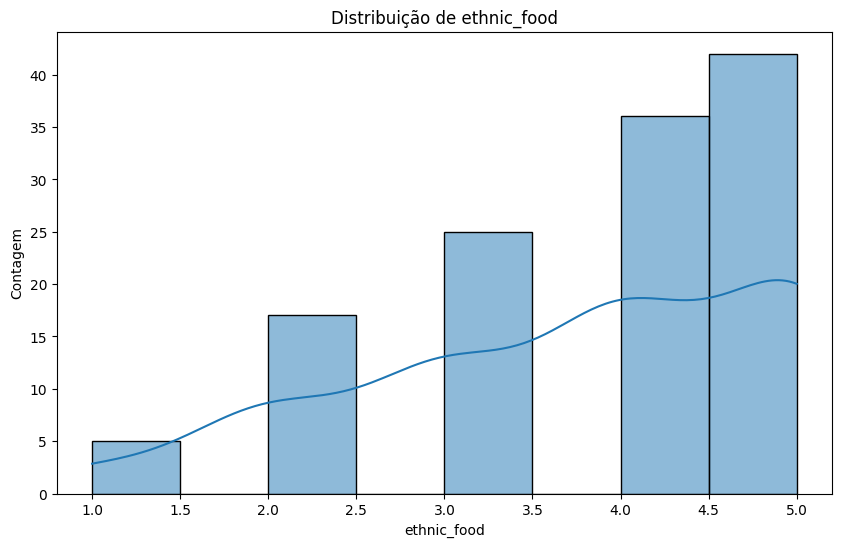

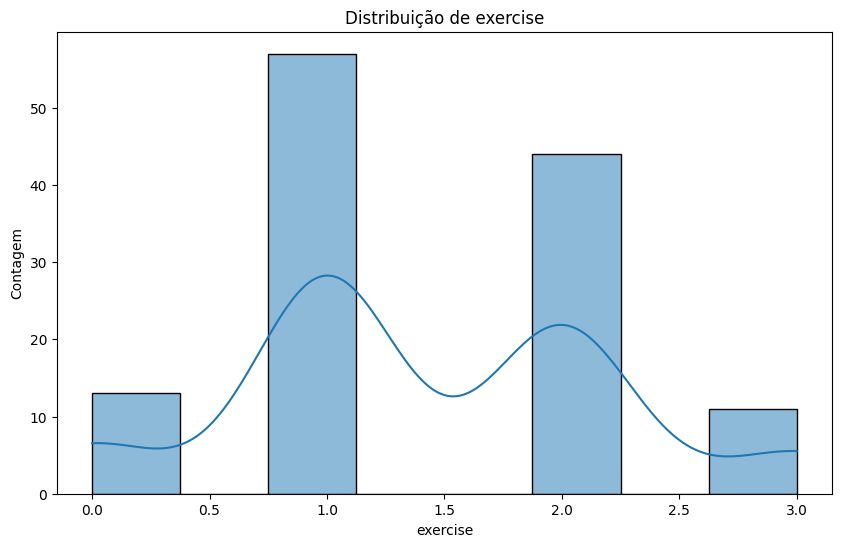

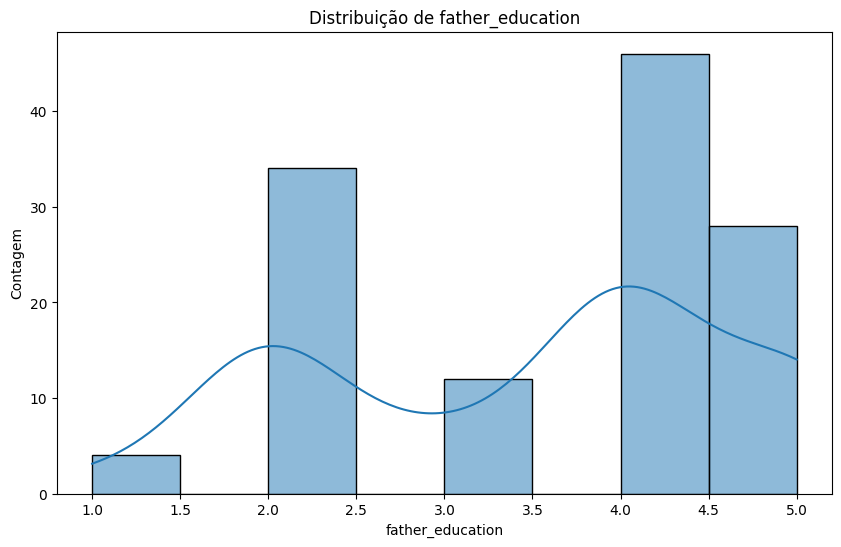

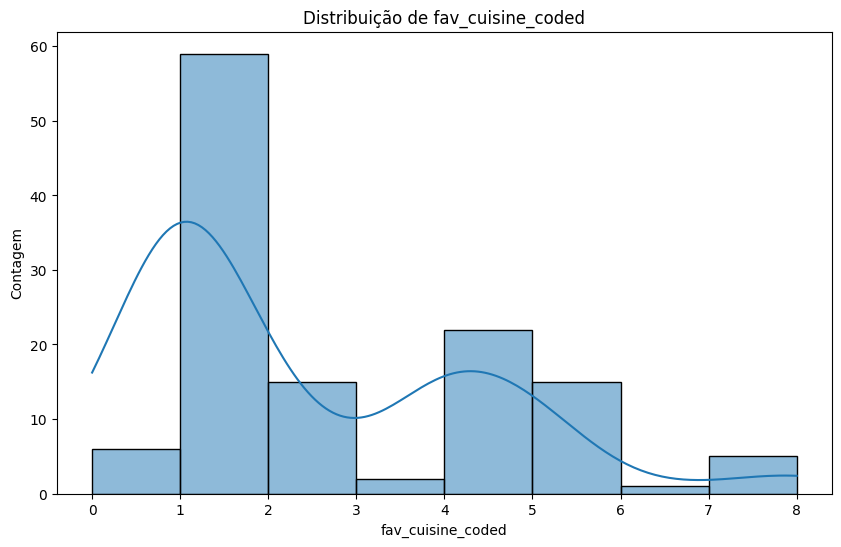

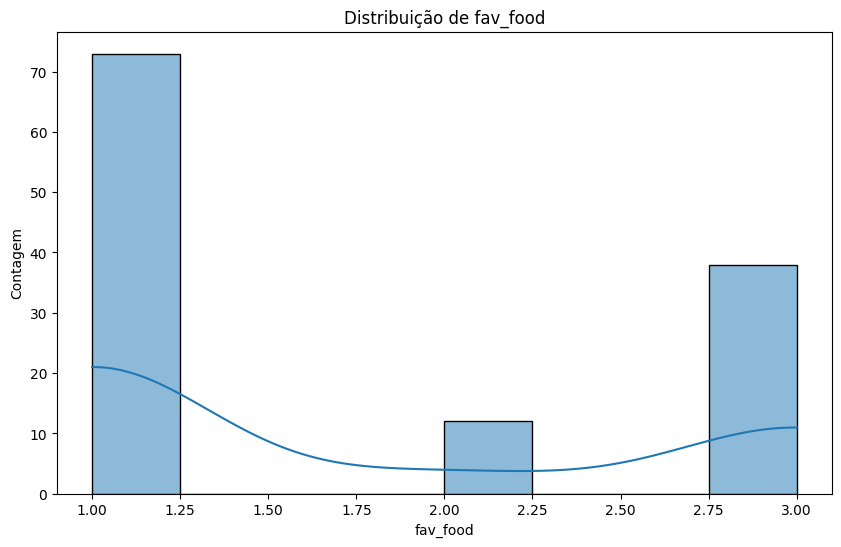

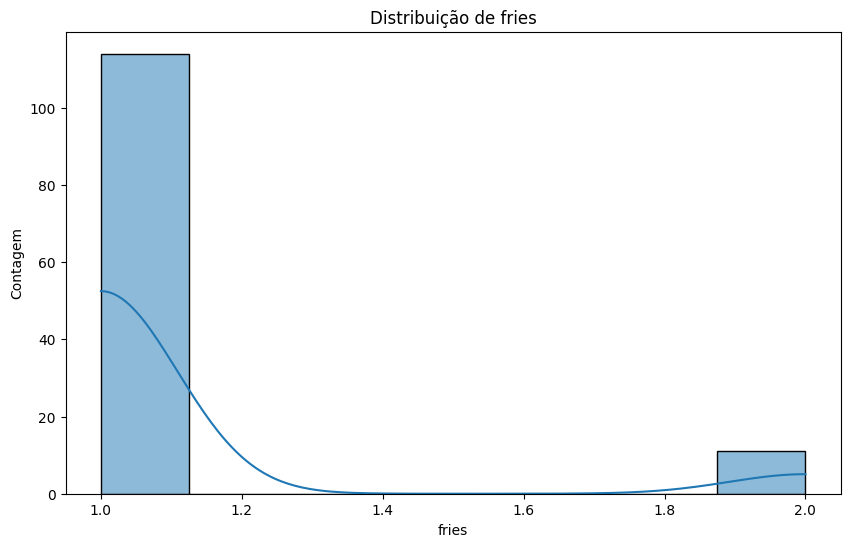

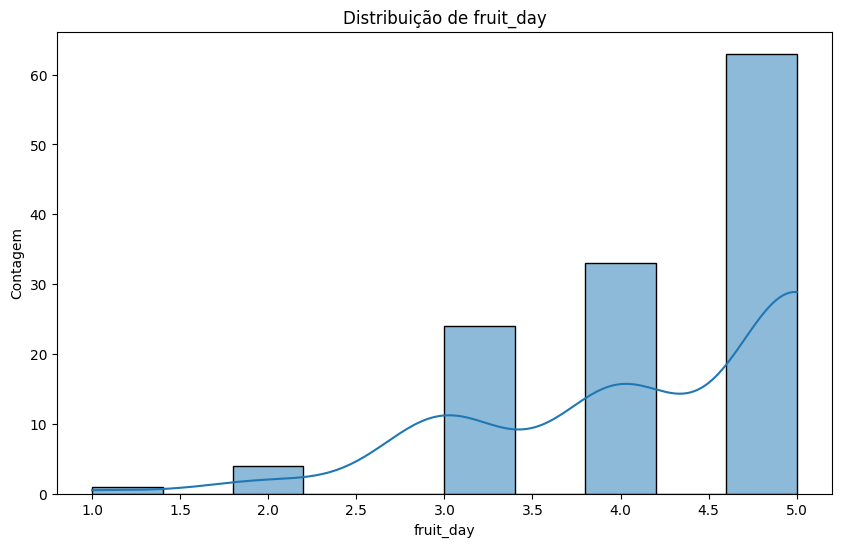

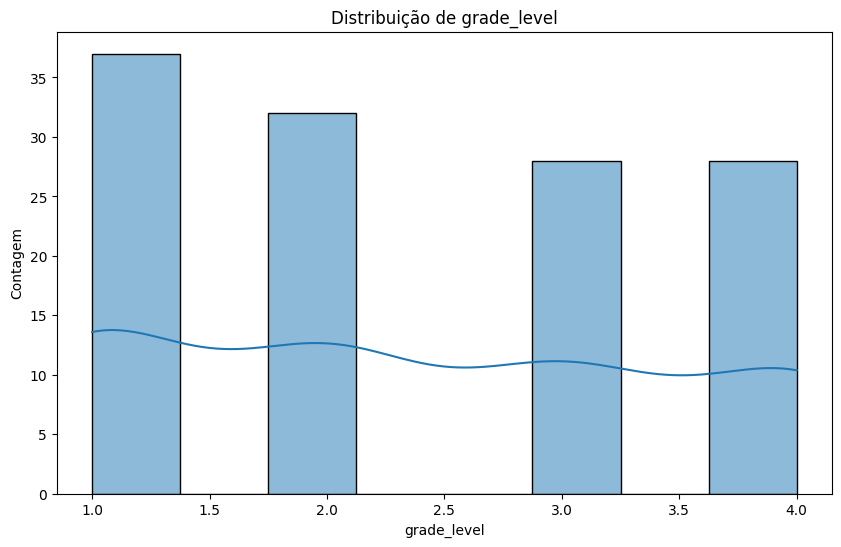

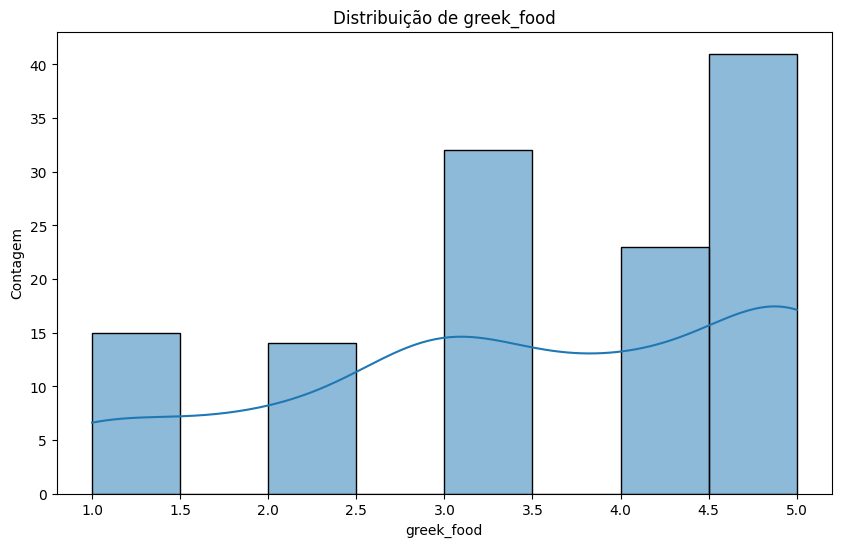

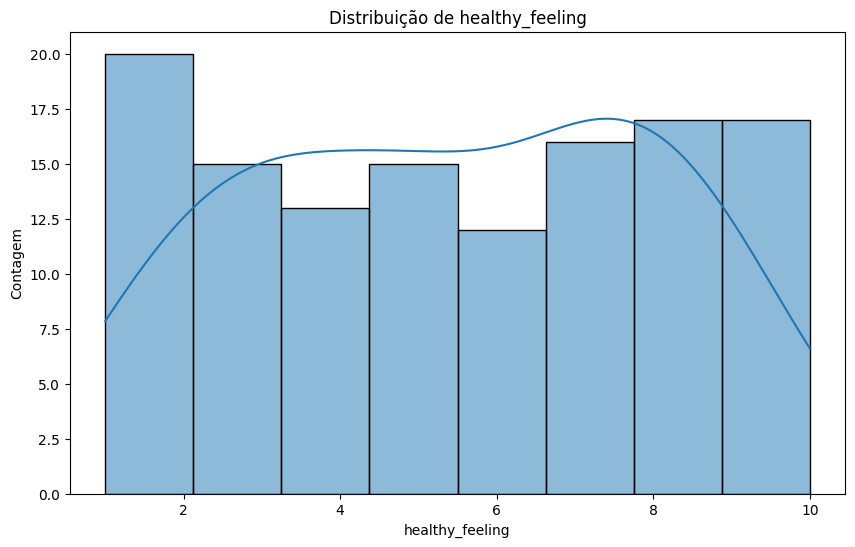

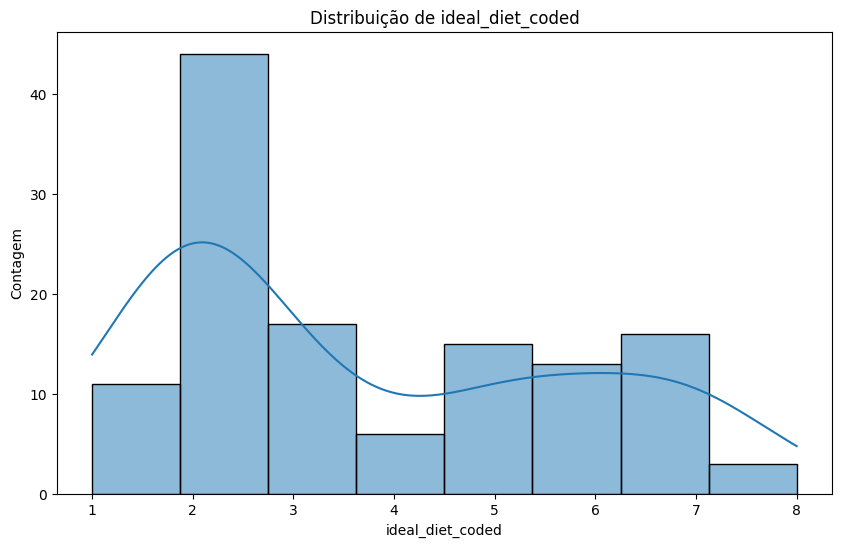

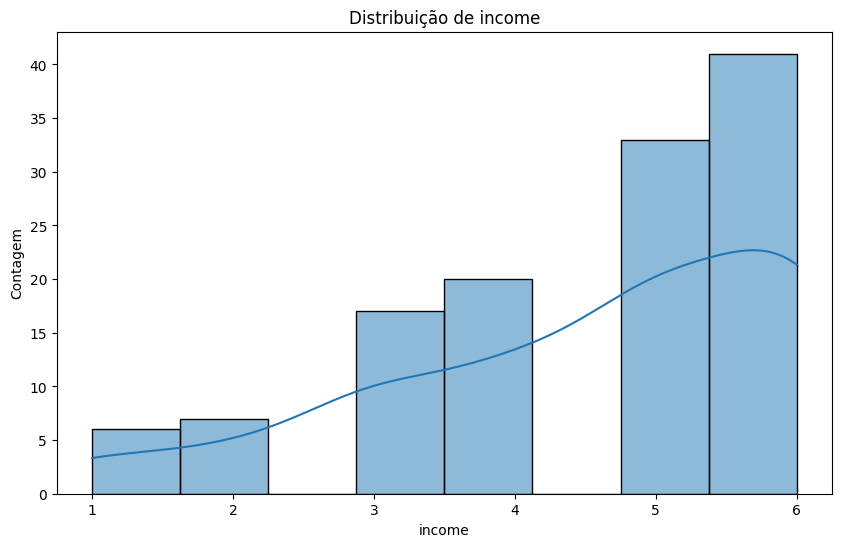

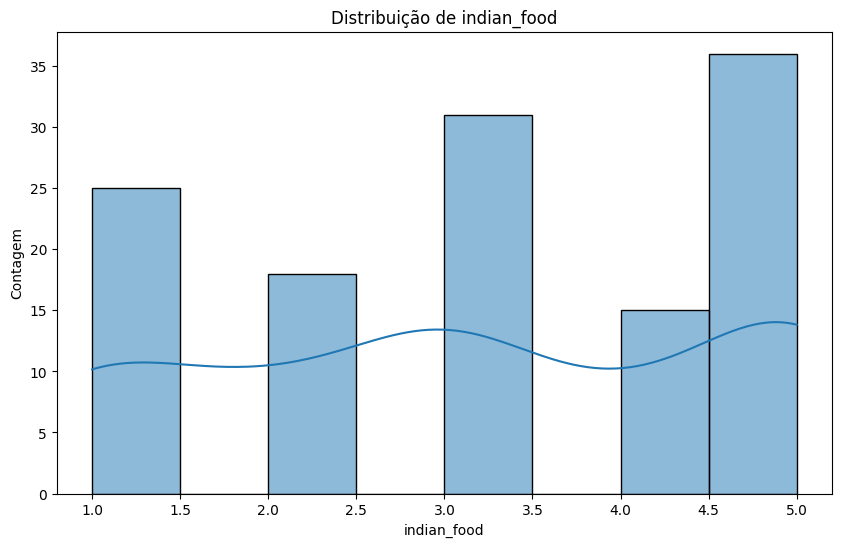

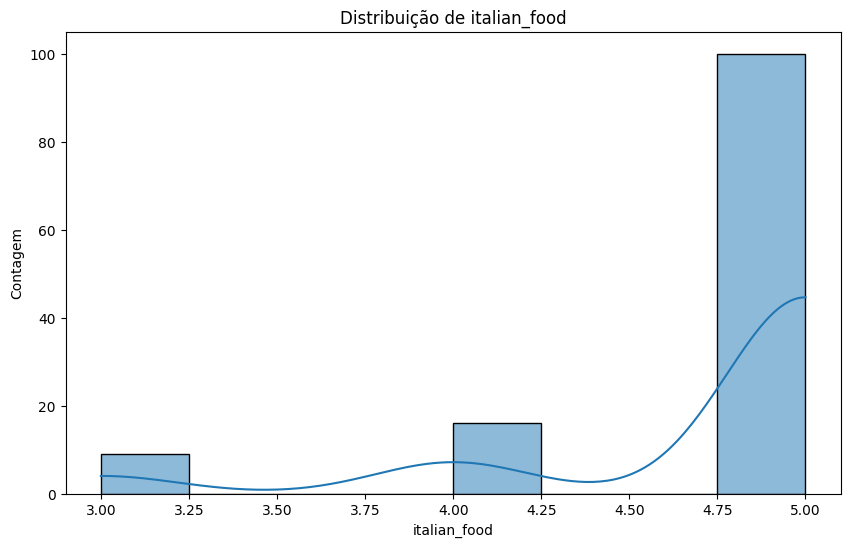

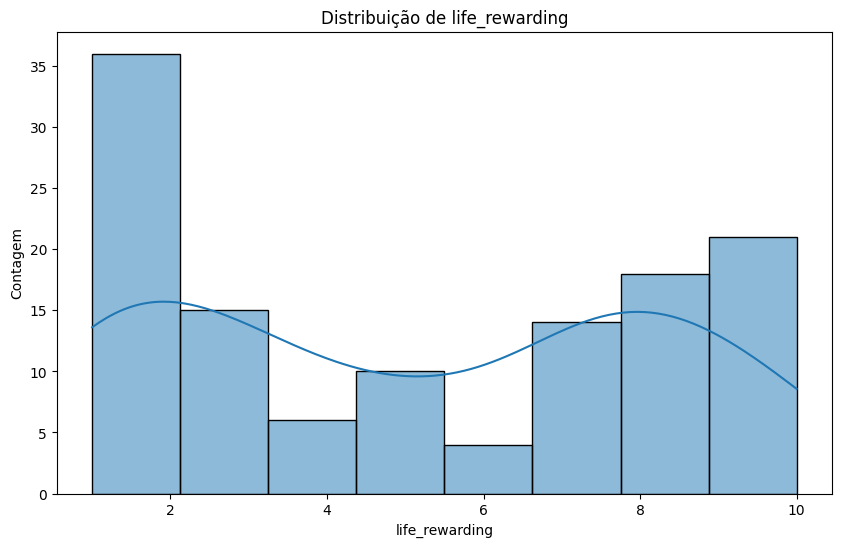

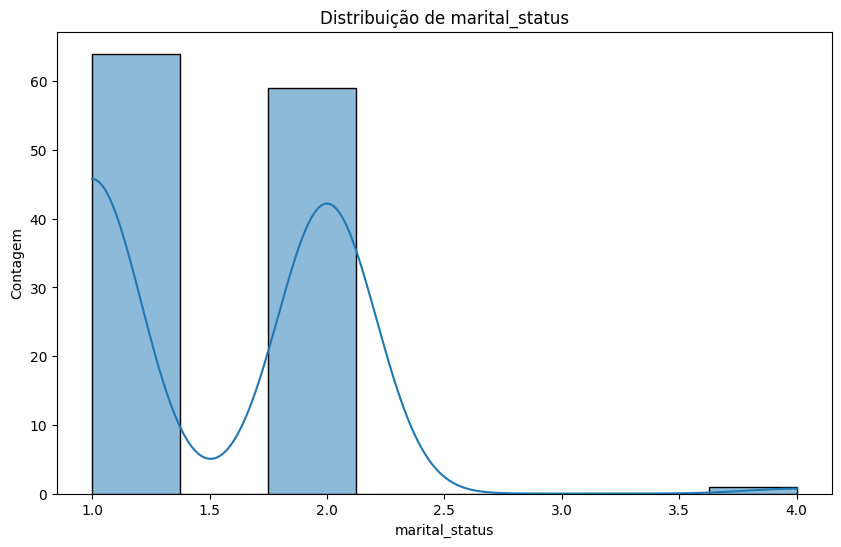

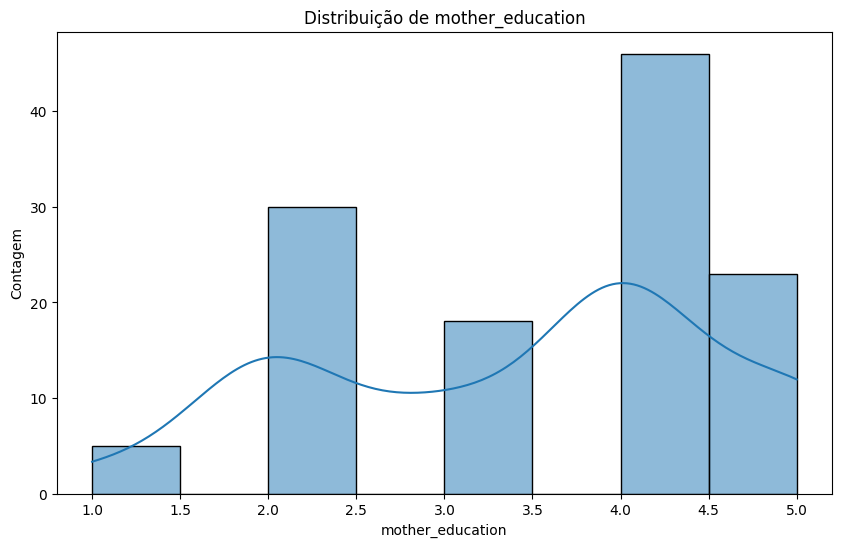

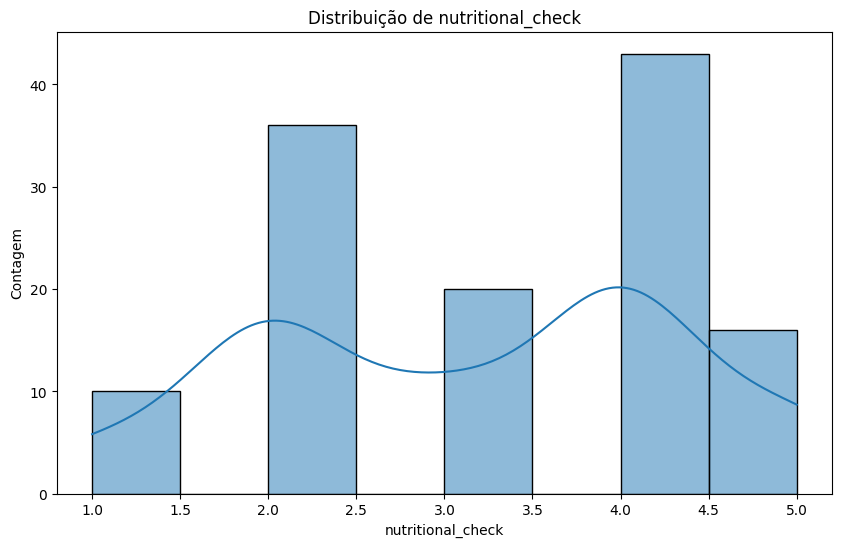

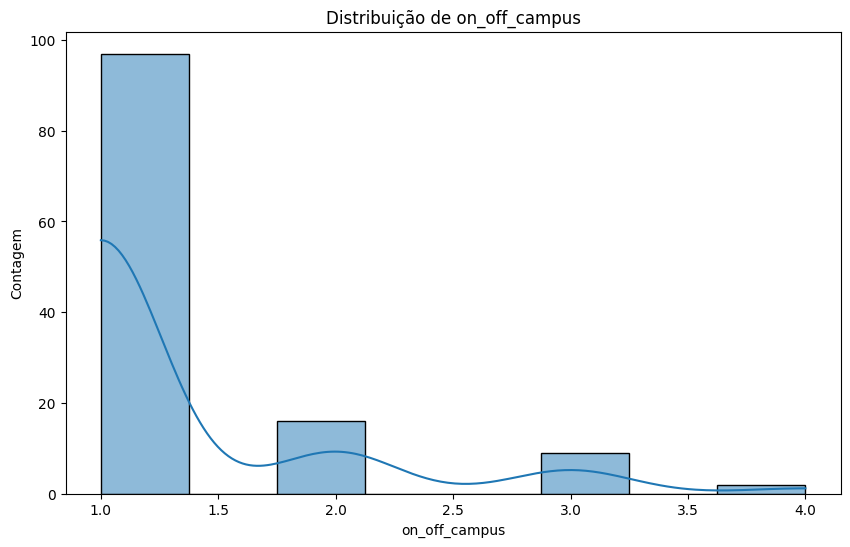

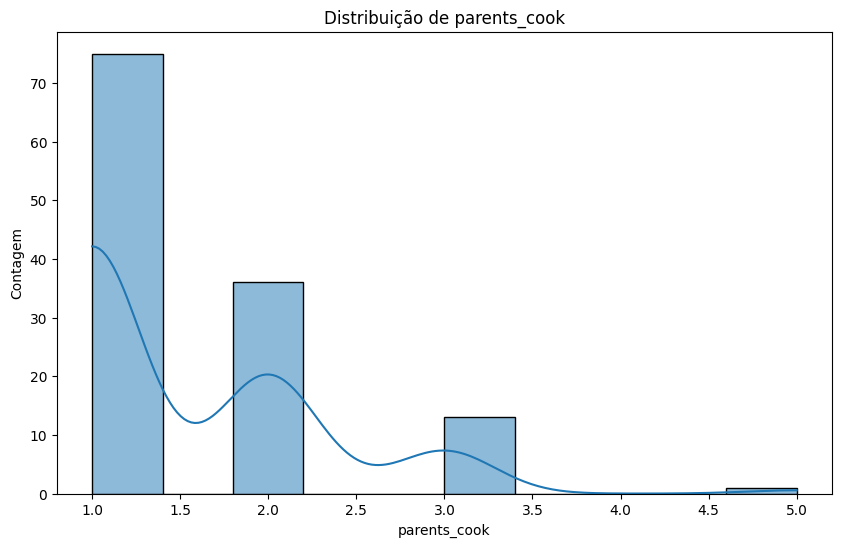

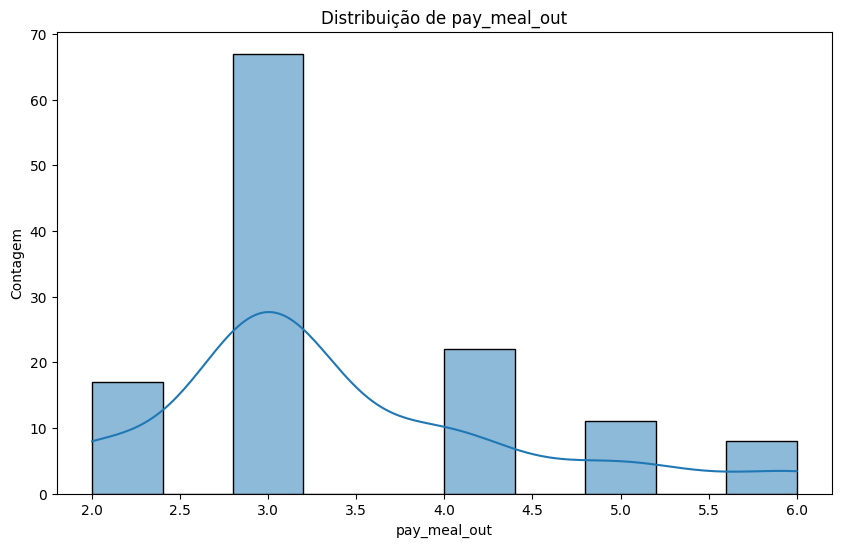

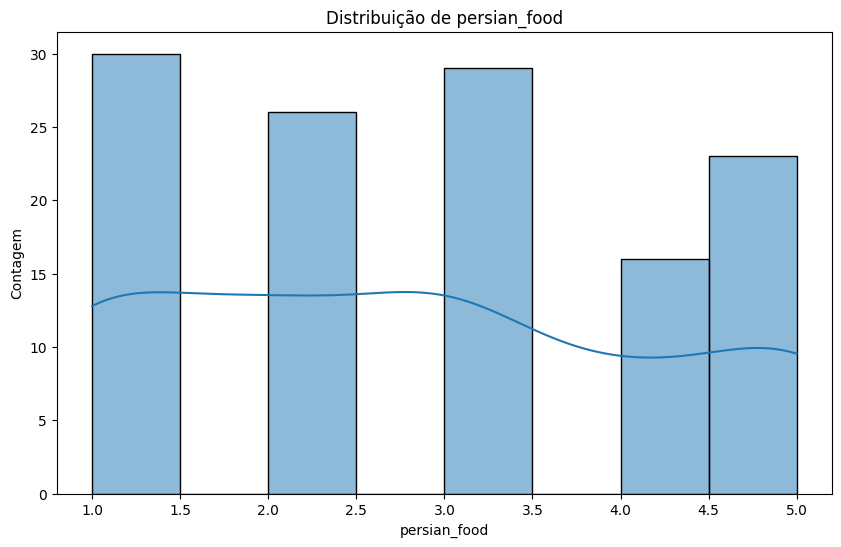

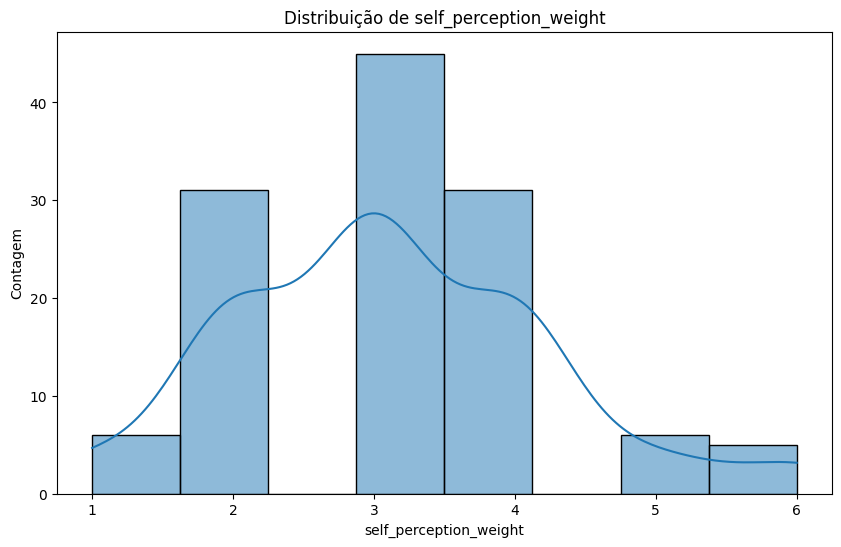

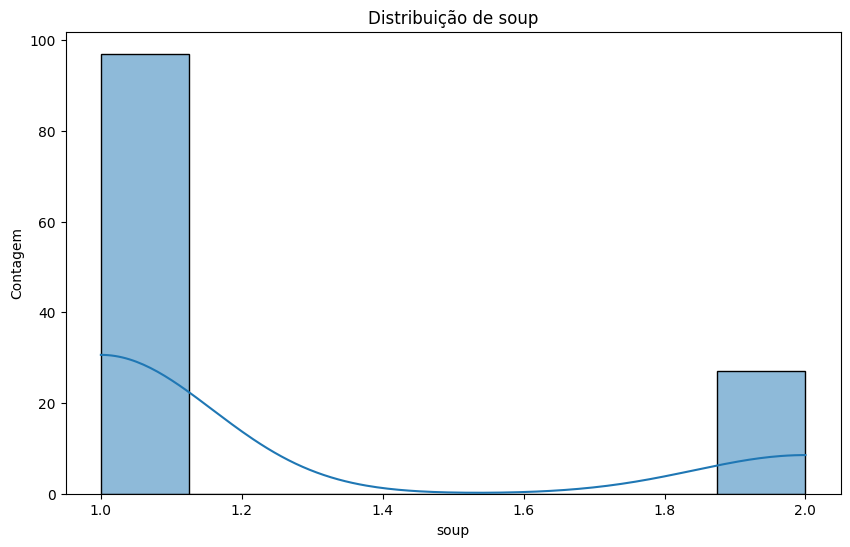

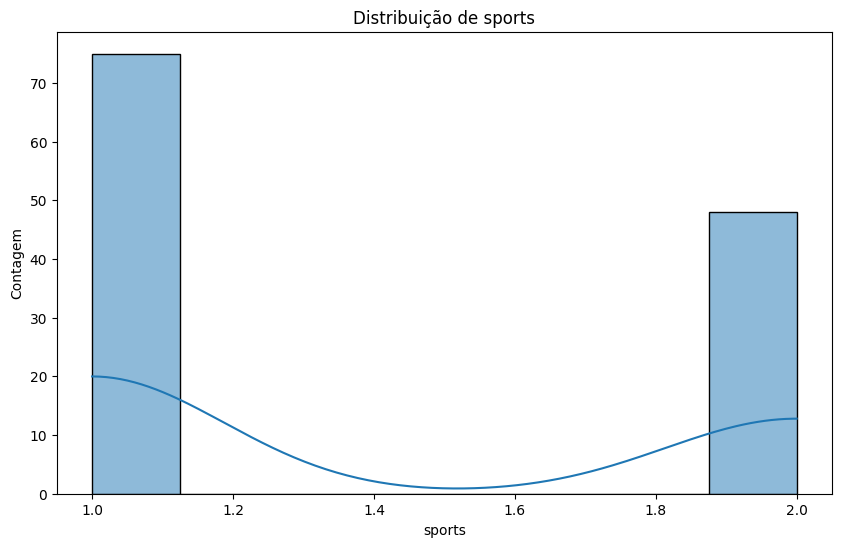

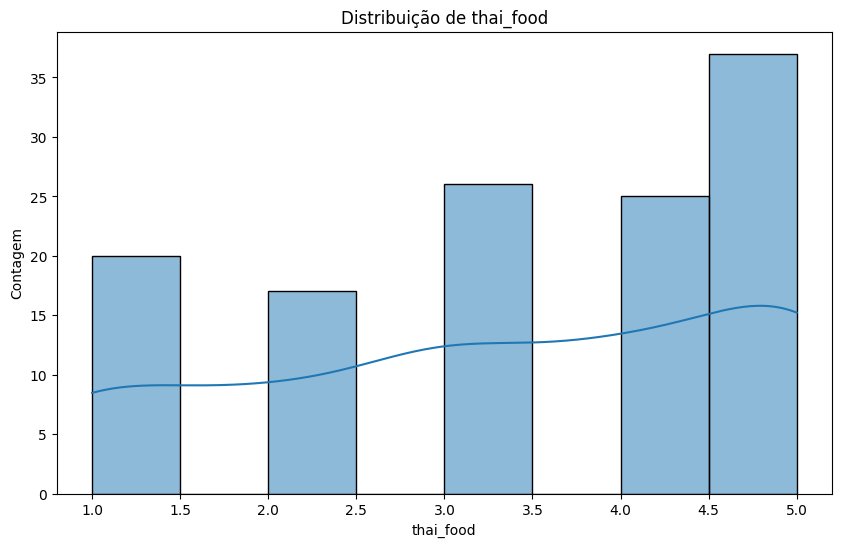

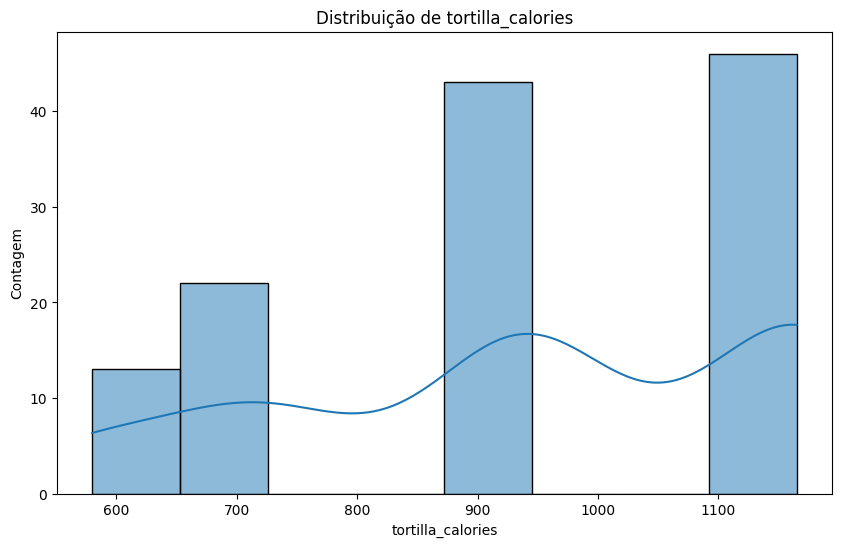

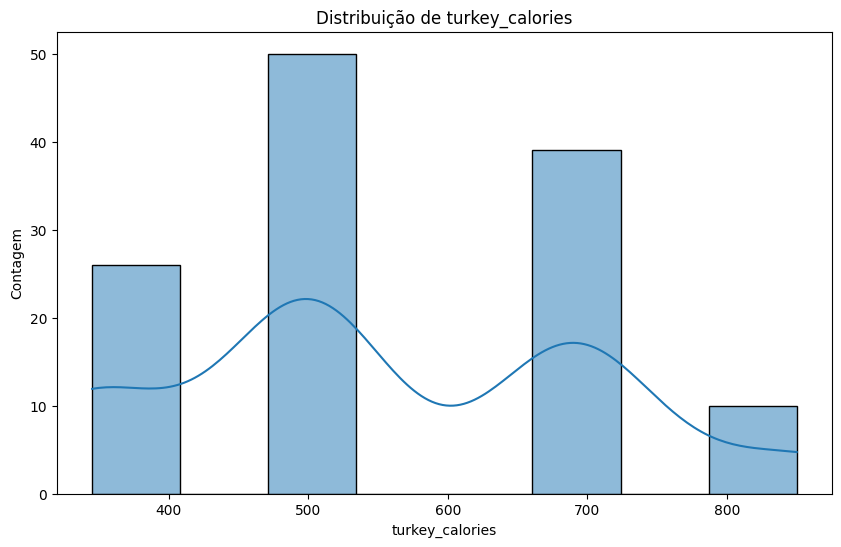

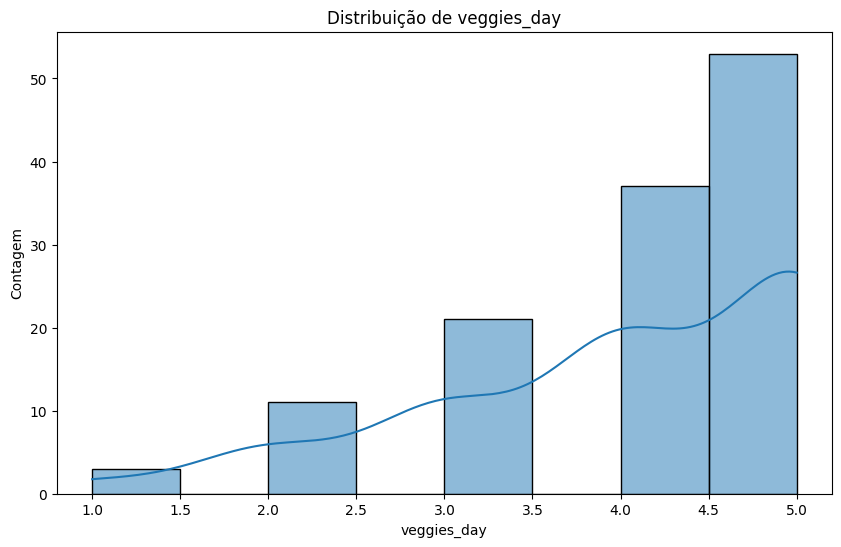

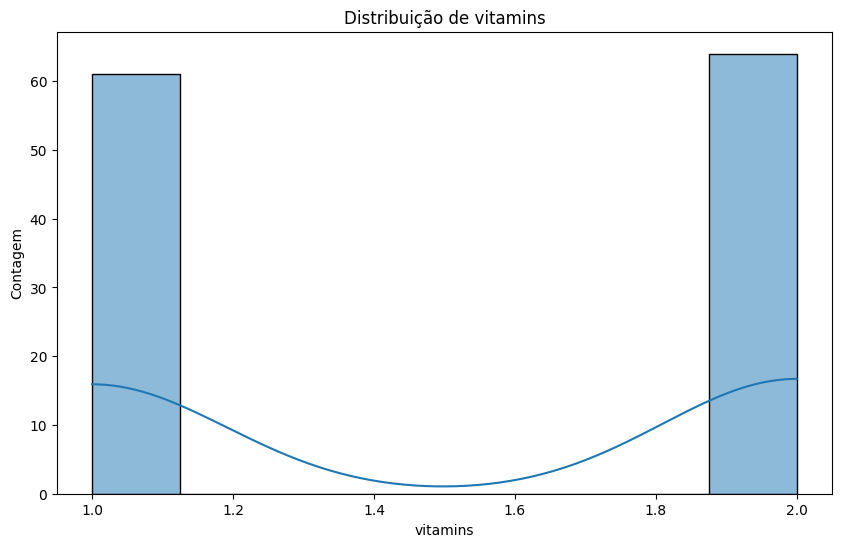

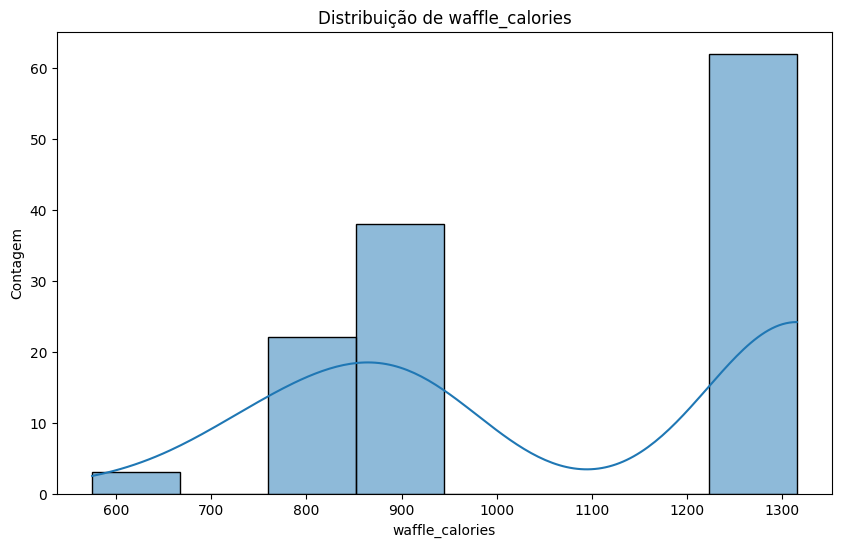

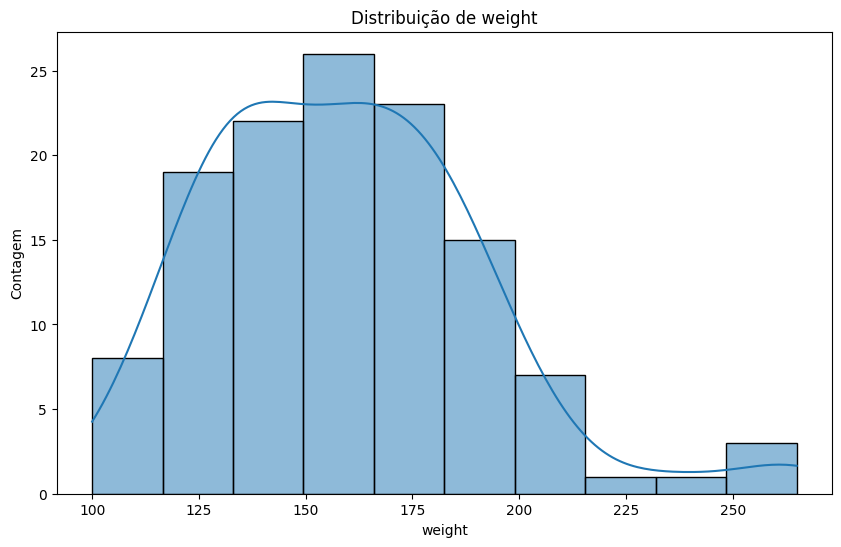

In [56]:
# Criando os histogramas para cada coluna numérica
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_processado, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.show()

## Matrix de correlação

In [57]:
numeric_df = df_processado.select_dtypes(include=['int64', 'float64'])
#  Remover NaN antes de calcular a correlação
numeric_df_clean = numeric_df.dropna()
corr_matrix = numeric_df_clean.corr()

In [58]:
corr_matrix.to_clipboard()

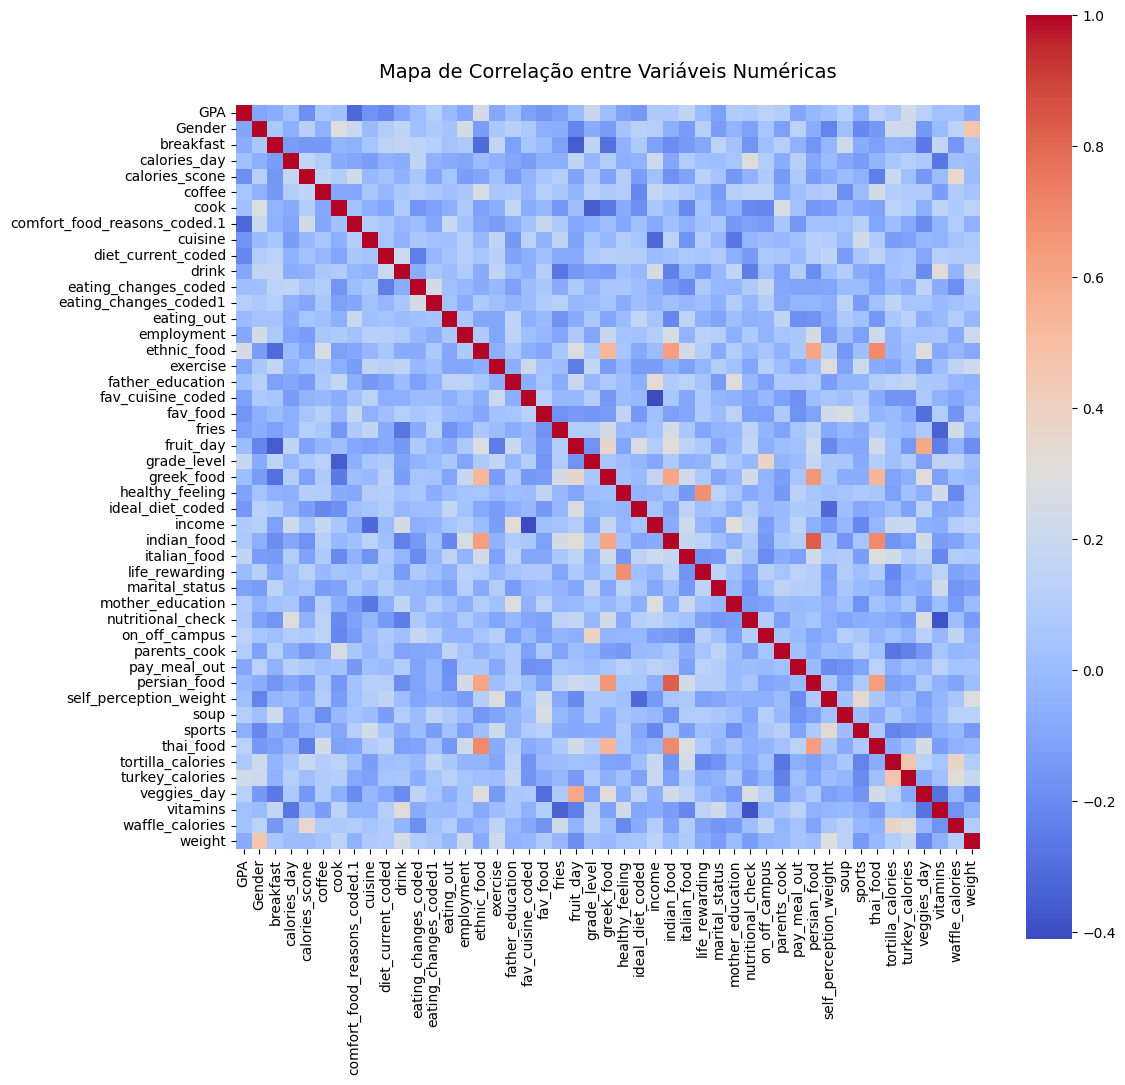

In [59]:
plt.figure(figsize=(12, 12))  # Tamanho do gráfico

# Criar o heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm', # Mapa de cores (azul-quente)
    square=True      # Formato quadrado para cada célula
)

# Ajustes finais
plt.title("Mapa de Correlação entre Variáveis Numéricas", pad=20, fontsize=14)
plt.show()

In [60]:
# Definir os limiares
threshold_high = 0.4  
threshold_low = -0.3   
# Criar máscara booleana
mask = (corr_matrix <= threshold_low) | (corr_matrix >= threshold_high)
mask = ~mask  # Inverter para esconder valores fora do critério
np.fill_diagonal(mask.values, False)


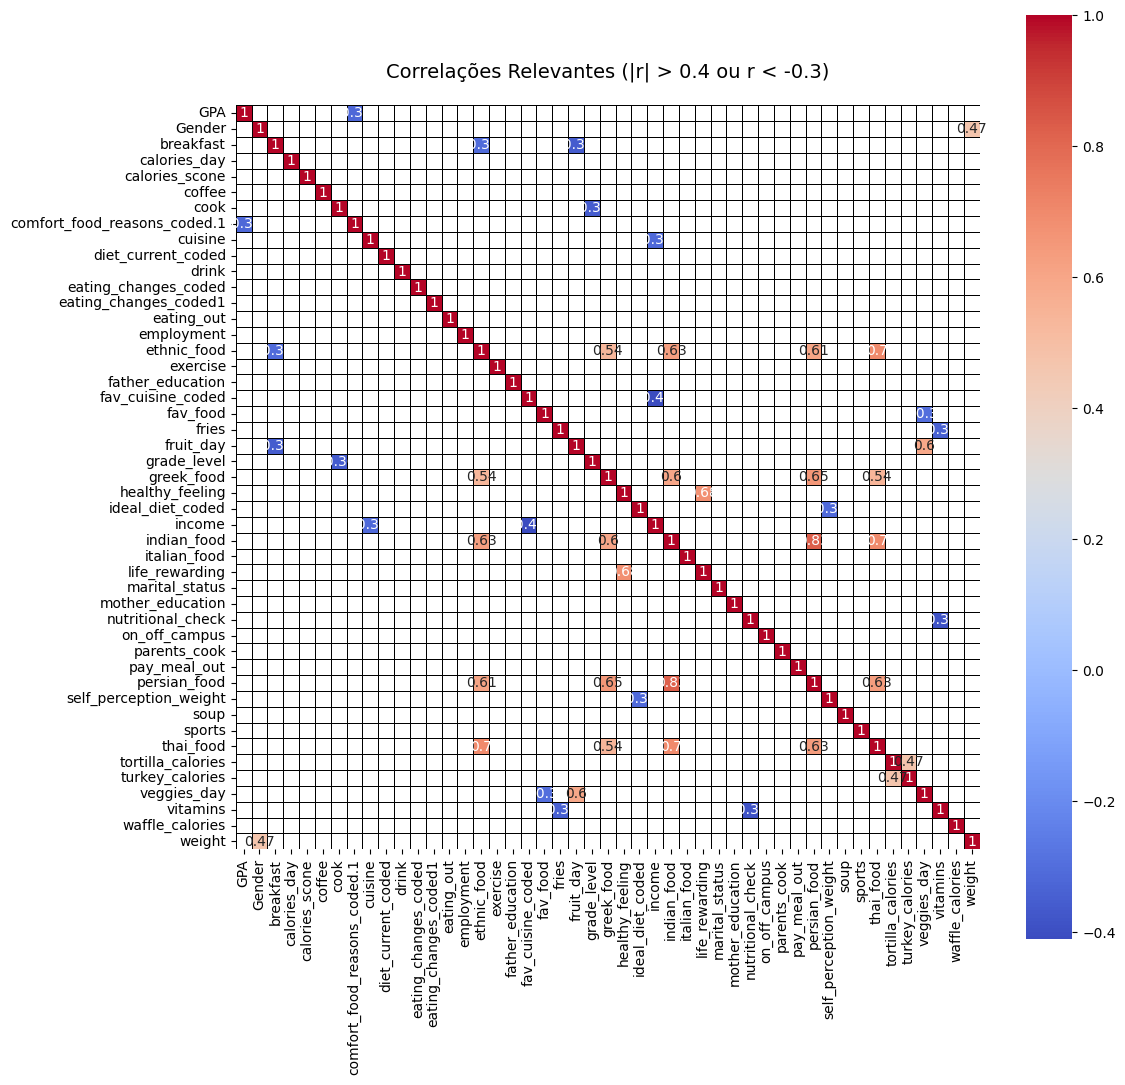

In [61]:
plt.figure(figsize=(12, 12))  

# Criar o heatmap
sns.heatmap(corr_matrix,
    mask=mask,
    cmap='coolwarm', # Mapa de cores (azul-quente)
    square=True,      # Formato quadrado para cada célula
    annot=True,
    linewidths=0.5,        # Espessura das linhas
    linecolor='black'      # Cor das linhas
    
)

# Ajustes finais
plt.title("Correlações Relevantes (|r| > 0.4 ou r < -0.3)", pad=20, fontsize=14)
plt.show()

In [62]:
df_processado['comfort_food_reasons_coded.1'].corr(df_processado['GPA'])

-0.19254678597630645

## Considerações iniciais e insights

 Grande parte das variáveis numéricas são variáveis categóricas, o que pode dificultar a análise de correlação.
Sendo assim, para guiar e facilitar a análise, vamos criar um gráfico de dispersão entre as variáveis GPA e weight para analisar a relação entre elas.
Bem como definir algumas Hipóteses para serem testadas posteriormente.

Contexto e hipótese para testar:<br>
Contexto: Apesar de não ter um correlação clara entre as variáveis GPA e demais variáveis categoricas, vamos verificar por box plot e testar hipóteses no seguinte contexto: <br>
**Estudantes que apresentam habitos saudaveis tem maior GPA?** <br>
H1: Estudantes que se exercitam com mais frequência (exercise) têm GPAs mais altos. <br>
H2: Estudantes com dietas mais saudáveis (diet_current_coded = 1) têm GPAs mais altos. <br>
(x)H3: O consumo de frutas (fruit_day) e vegetais (veggies_day) está positivamente correlacionado com o GPA <br>
(x)H4: Estudantes que se importam com valores nutricionais('nutritional_check') tem GPA mais altos





## Analise da variável exercise e GPA

legenda da variável exercise:<br>
0 = "não informado"<br>
1 = Todo dia <br>
2 = 2-3x/semana <br>
3 = 1x/semana <br>
4 = Às vezes<br>
5 = Nunca<br>

<Axes: xlabel='exercise', ylabel='GPA'>

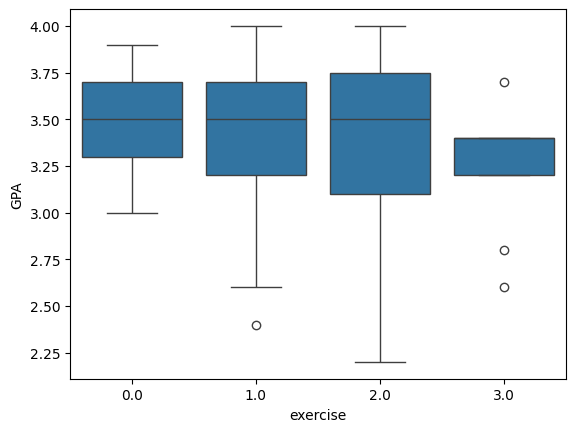

In [63]:
sns.boxplot(data=df_processado, y='GPA', x='exercise')

In [64]:
df_processado_limpo = df_processado[df_processado['exercise'] != 0].copy()
# Verificar distribuição
print(df_processado_limpo['exercise'].value_counts())

exercise
1.0    57
2.0    44
3.0    11
Name: count, dtype: int64


In [ ]:
# Testand H1: Estudantes que se exercitam com mais frequência (exercise) têm GPAs mais altos. <br>


X = sm.add_constant(df_processado_limpo['exercise']) 
y = df_processado_limpo['GPA']

# Modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.206
Date:                Sat, 12 Apr 2025   Prob (F-statistic):              0.274
Time:                        14:06:42   Log-Likelihood:                -54.045
No. Observations:                 112   AIC:                             112.1
Df Residuals:                     110   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5088      0.097     36.101      0.0

### Conclusão de H1 (Exercise e GPA) <br>

R-QUADRADO (0.011): Apenas 1.1% da variação no GPA é explicada pela frequência de exercícios. **Isso indica que o modelo tem poder explicativo extremamente baixo.** <br>

Prob (F) = 0.274: O p-valor > 0.05 confirma que o modelo não é estatisticamente significativo. **A variável exercise não explica o GPA de forma relevante**

## Analise da variável diet_current_coded e GPA

<Axes: xlabel='diet_current_coded', ylabel='GPA'>

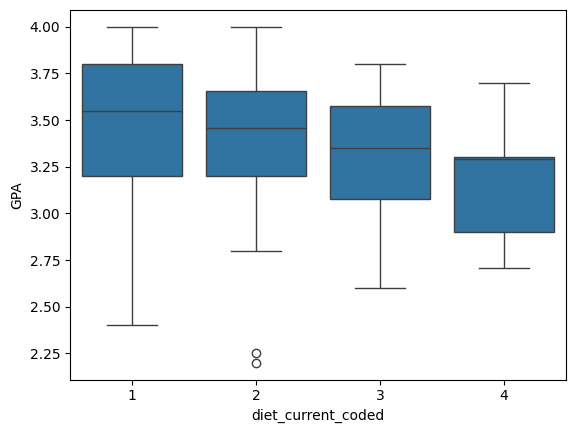

In [ ]:
#H2: Estudantes com dietas mais saudáveis (diet_current_coded = 1) têm GPAs mais altos. 
sns.boxplot(data=df_processado, y='GPA', x='diet_current_coded')

In [83]:
# Filtrar dados válidos e criar dummies
df_clean_diet = df_processado.dropna(subset=['GPA', 'diet_current_coded']).copy()
dummies = pd.get_dummies(df_clean_diet['diet_current_coded'], prefix='diet', drop_first=True).astype(int)  # Evita multicolinearidade (se naof or int e for boo vai dar pau)
df_clean_diet = pd.concat([df_clean_diet['GPA'], dummies], axis=1)

# Renomear colunas para clareza (opcional)
df_clean_diet.columns = ['GPA', 'Nao_saudavel', 'Repetitiva', 'Inconclusivo']

In [84]:
print("\nTipos de dados após processamento:")
print(df_clean_diet.dtypes)


Tipos de dados após processamento:
GPA             float64
Nao_saudavel      int32
Repetitiva        int32
Inconclusivo      int32
dtype: object


In [88]:
# Definir variáveis (GPA ~ dietas)
X = df_clean_diet[['Nao_saudavel', 'Repetitiva', 'Inconclusivo']].apply(pd.to_numeric, errors='coerce')  # Garantir que os dados sejam numéricos
X = sm.add_constant(X)  # Adicionar constante para o modelo
y = df_clean_diet['GPA']

# Modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.199
Date:                Sat, 12 Apr 2025   Prob (F-statistic):              0.313
Time:                        15:38:10   Log-Likelihood:                -55.283
No. Observations:                 125   AIC:                             118.6
Df Residuals:                     121   BIC:                             129.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.4719      0.054     64.144   

### Conclusão de H2 (GPA e diet_current_code)

Graficamente, analisando o fráfico de boxplot, aparentemente estudantes que sinalizaram possuir uma dieta saudavel tme uma média GPA maior

R-QUADRADO (0.028): Apenas 2.9% da variação no GPA é explicada pela frequência de exercícios. **Isso indica que o modelo tem poder explicativo extremamente baixo.** <br>

Prob (F) = 0.254: O p-valor > 0.05 confirma que o modelo não é estatisticamente significativo. **A variável exercise não explica o GPA de forma relevante**



<Axes: xlabel='fruit_day', ylabel='GPA'>

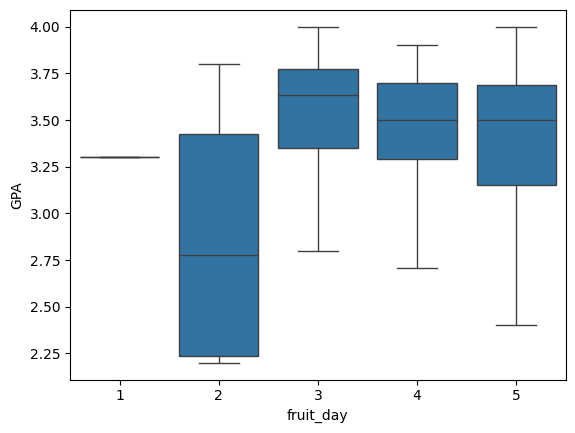

In [67]:
sns.boxplot(data=df_processado, y='GPA', x='fruit_day')

## Analise da variável veggie_day / nutricional_check e GPA

<Axes: xlabel='veggies_day', ylabel='GPA'>

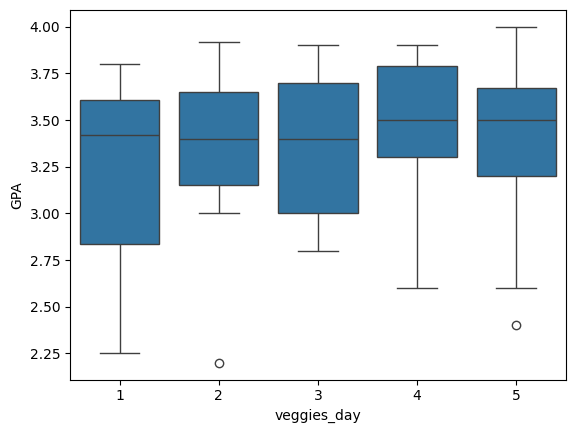

In [68]:
sns.boxplot(data=df_processado, y='GPA', x='veggies_day')

<Axes: xlabel='nutritional_check', ylabel='GPA'>

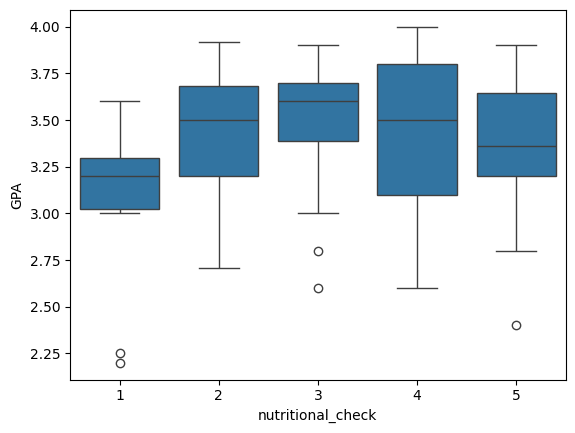

In [69]:
sns.boxplot(data=df_processado, y='GPA', x='nutritional_check')

### H3: Estudantes que consomem mais frutas e vegetais (fruit_day e veggies_day) têm GPAs mais altos. <br>



Graficamente, analisando  boxplot não podemos fazzer nenhuma afirmação ou suposição, pois não há diferença significativa entre os grupos. <br>
Com, isso optei por não fazer o teste estatístico(adaptando OLS), pois não há diferença significativa entre os grupos. <br>	